
# Introduction

In this project, we will see how to train a logistic regression model. This is intended as an introduction to logistic regression. However, we will not go through the mathematical intuition of the model. 

We will be working with the Breast Cancer dataset, which contains some very detailed measurements of cells. Along with each observation of measurements, we have the diagnosis of the cell (malignant or not). Our goal is to train a model that will be able to predict whether or not a given cell is malignant given only its measurements.

For more information on the dataset, feel free to check the dataset page. For the video version of this tutorial, check out [this youtube video](https://youtu.be/My4JgIeFdWk).

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Import the data
Let's start exploring the dataset and get a feel of what it represents. We can, for example, see that all the variables in our dataset –except the ID and the diagnosis– are already of type float64, which means that they are numerical. This is great for our intitial intuition of using a logistic regression model. This is because the logistic regression model takes numerical values as input and outputs a binary classification value (yes/no value).

In [56]:
df = pd.read_csv("breast_cancer.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [57]:
df.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [59]:
df.shape

(569, 33)

# Observations from dataset
- columns ending with _worst typically represent the worst-case values or maximum values for certain measurements (e.g., tumor characteristics like radius, texture, smoothness, etc.). These columns are calculated to provide the worst observed performance for each feature across all samples.
-columns ending with _se: Standard error, showing variability.

In [60]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [61]:
# Lets look at above data at a different way
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [62]:
# Lets look at target/response variable
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

diagnosis
B    357
M    212
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='diagnosis'>

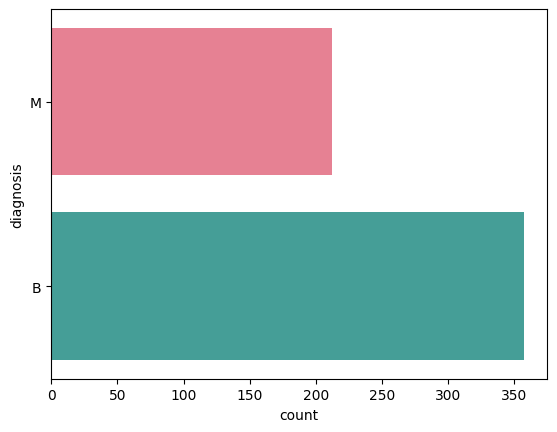

In [63]:
print(df['diagnosis'].value_counts())

sns.countplot(df['diagnosis'], palette='husl')

## Clean the data

By using a heatmap, we can easily visualize the presence of NAs in the dataset and address them accordingly. In this example, the dataset come with an entire column of NAs. We will drop it, along with the ID column (which is useless for our purposes) and continue with our analysis. 

We will also be converting our target variable into 1s and 0s in order to train the model.

Other than that, the dataset seems to be rather clean, so we will not need any further cleaning.

<Axes: >

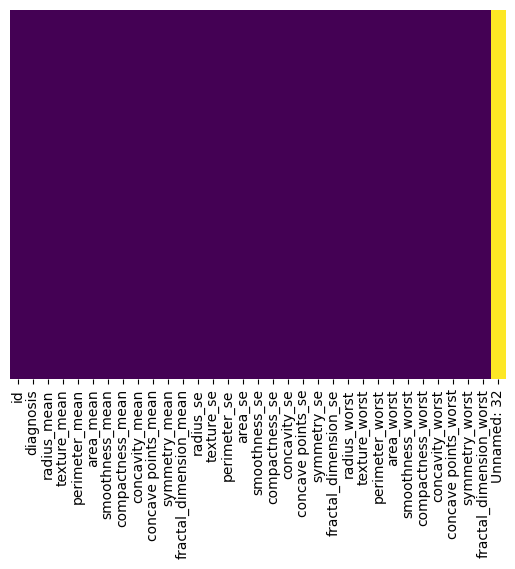

In [64]:
# visualize NAs in heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### We see that entire column Unnamed: 32 is empty


In [65]:
# drop id and empty column
df.drop(['Unnamed: 32', "id"], axis=1, inplace=True)

In [66]:
# check missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [67]:
# turn target variable into 1s and 0s
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [68]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Any correlation between variable ?

In [69]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


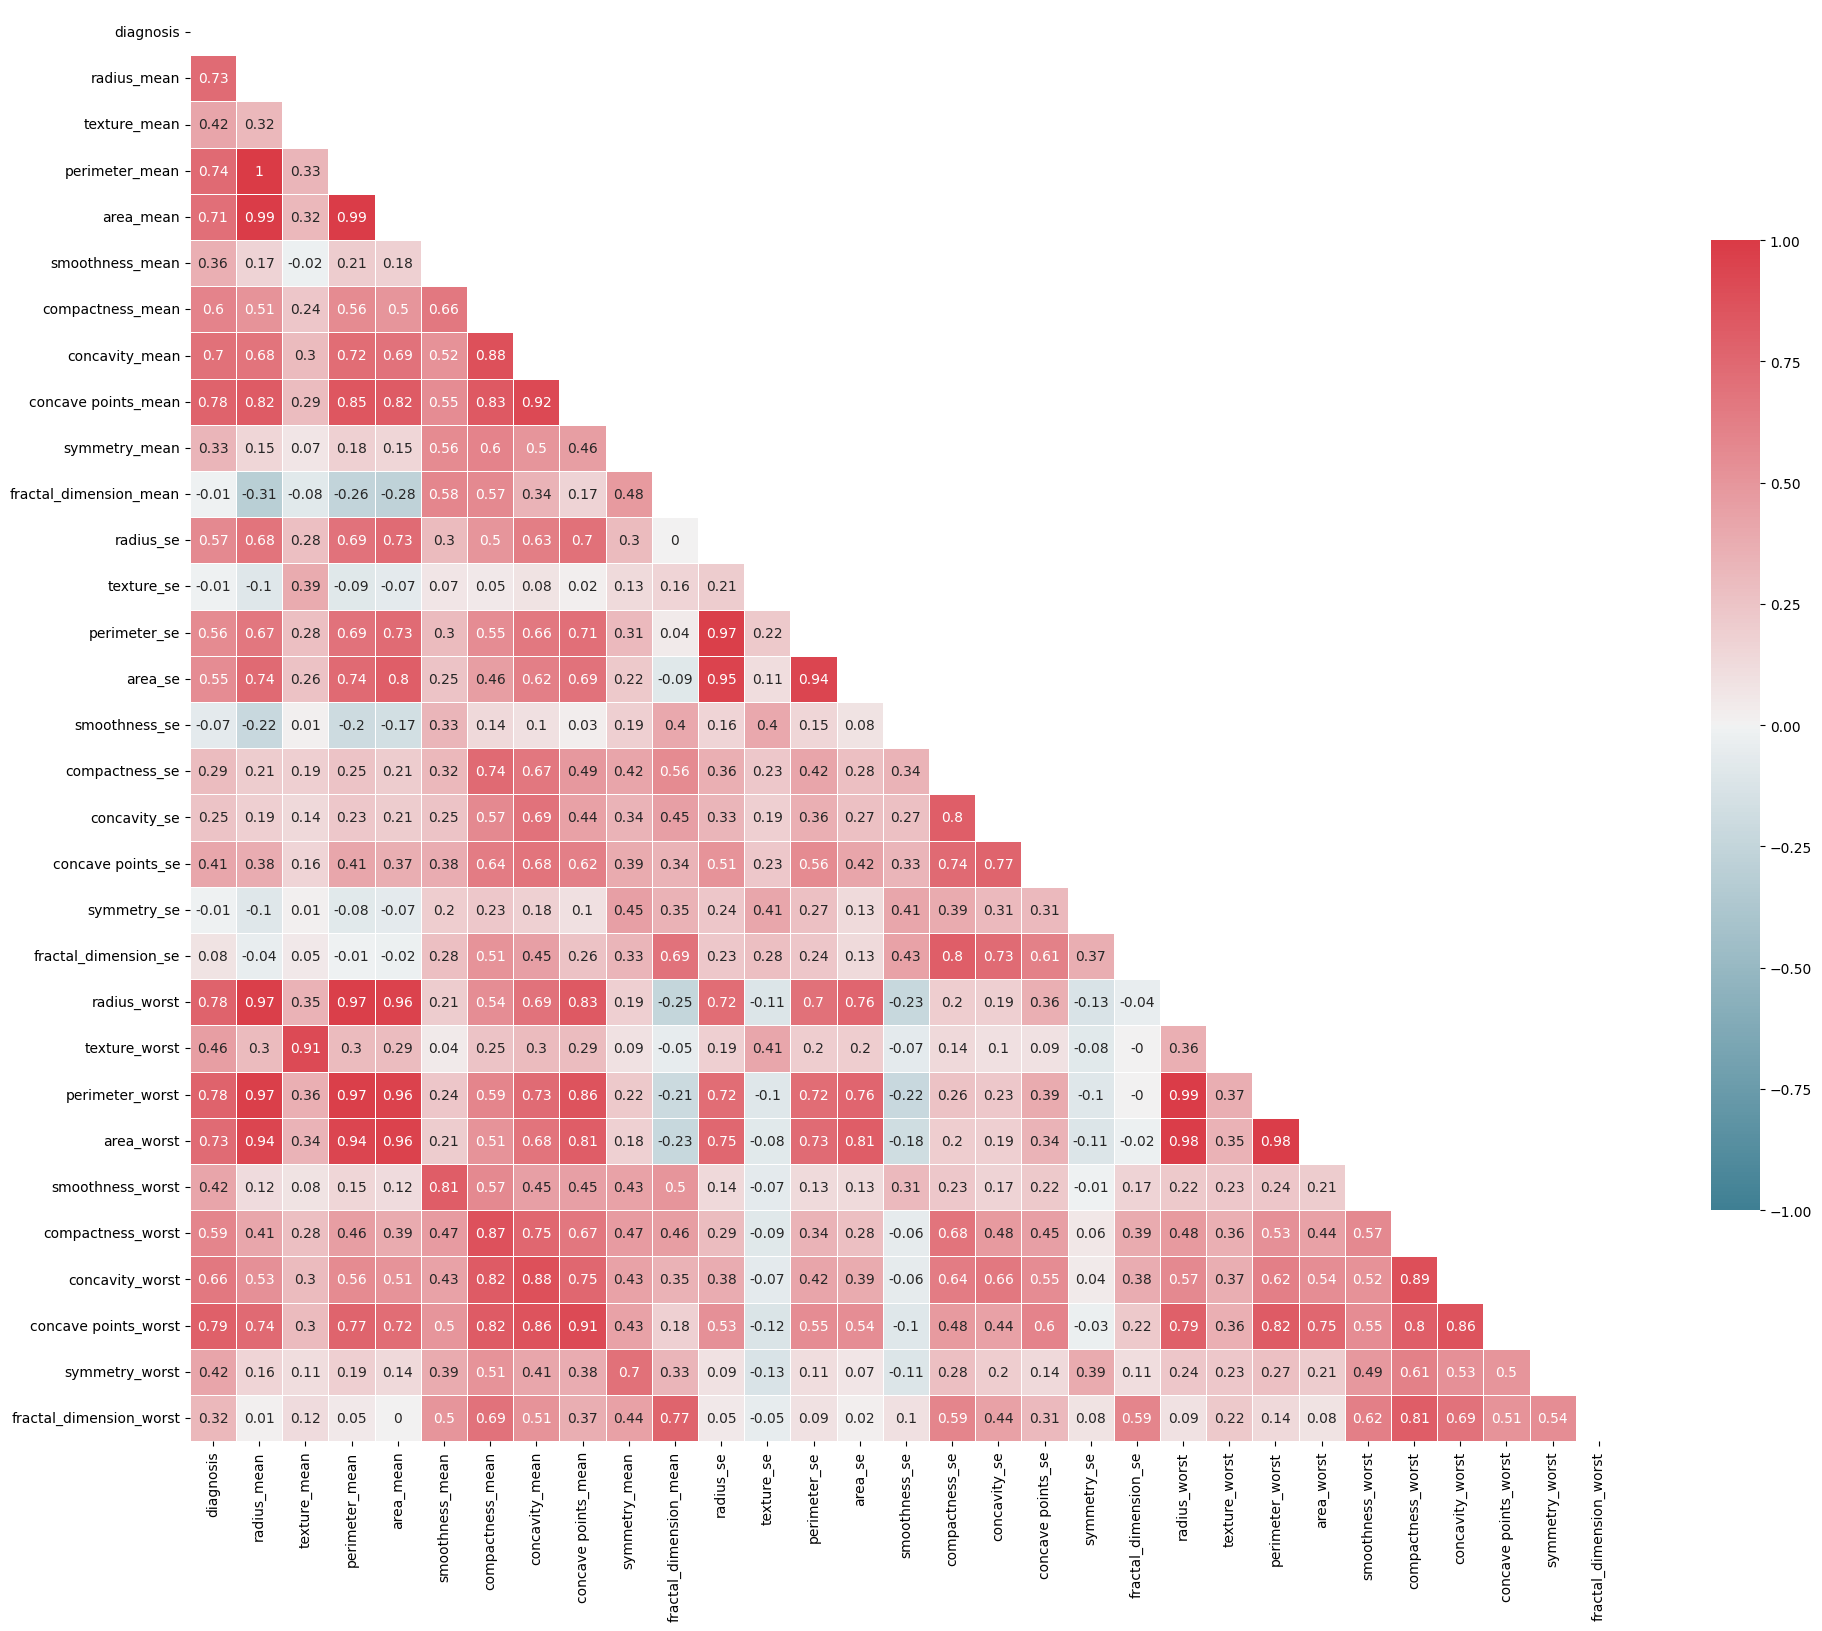

In [70]:
# Let view above via heatmap
# plt.figure(figsize=(20,20))
# plt.title("Correlation Heatmap")
# sns.heatmap(df.corr(), annot=True)

# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

### radius_mean , perimeter_mean, area_mean have a high correlation with malignant tumor

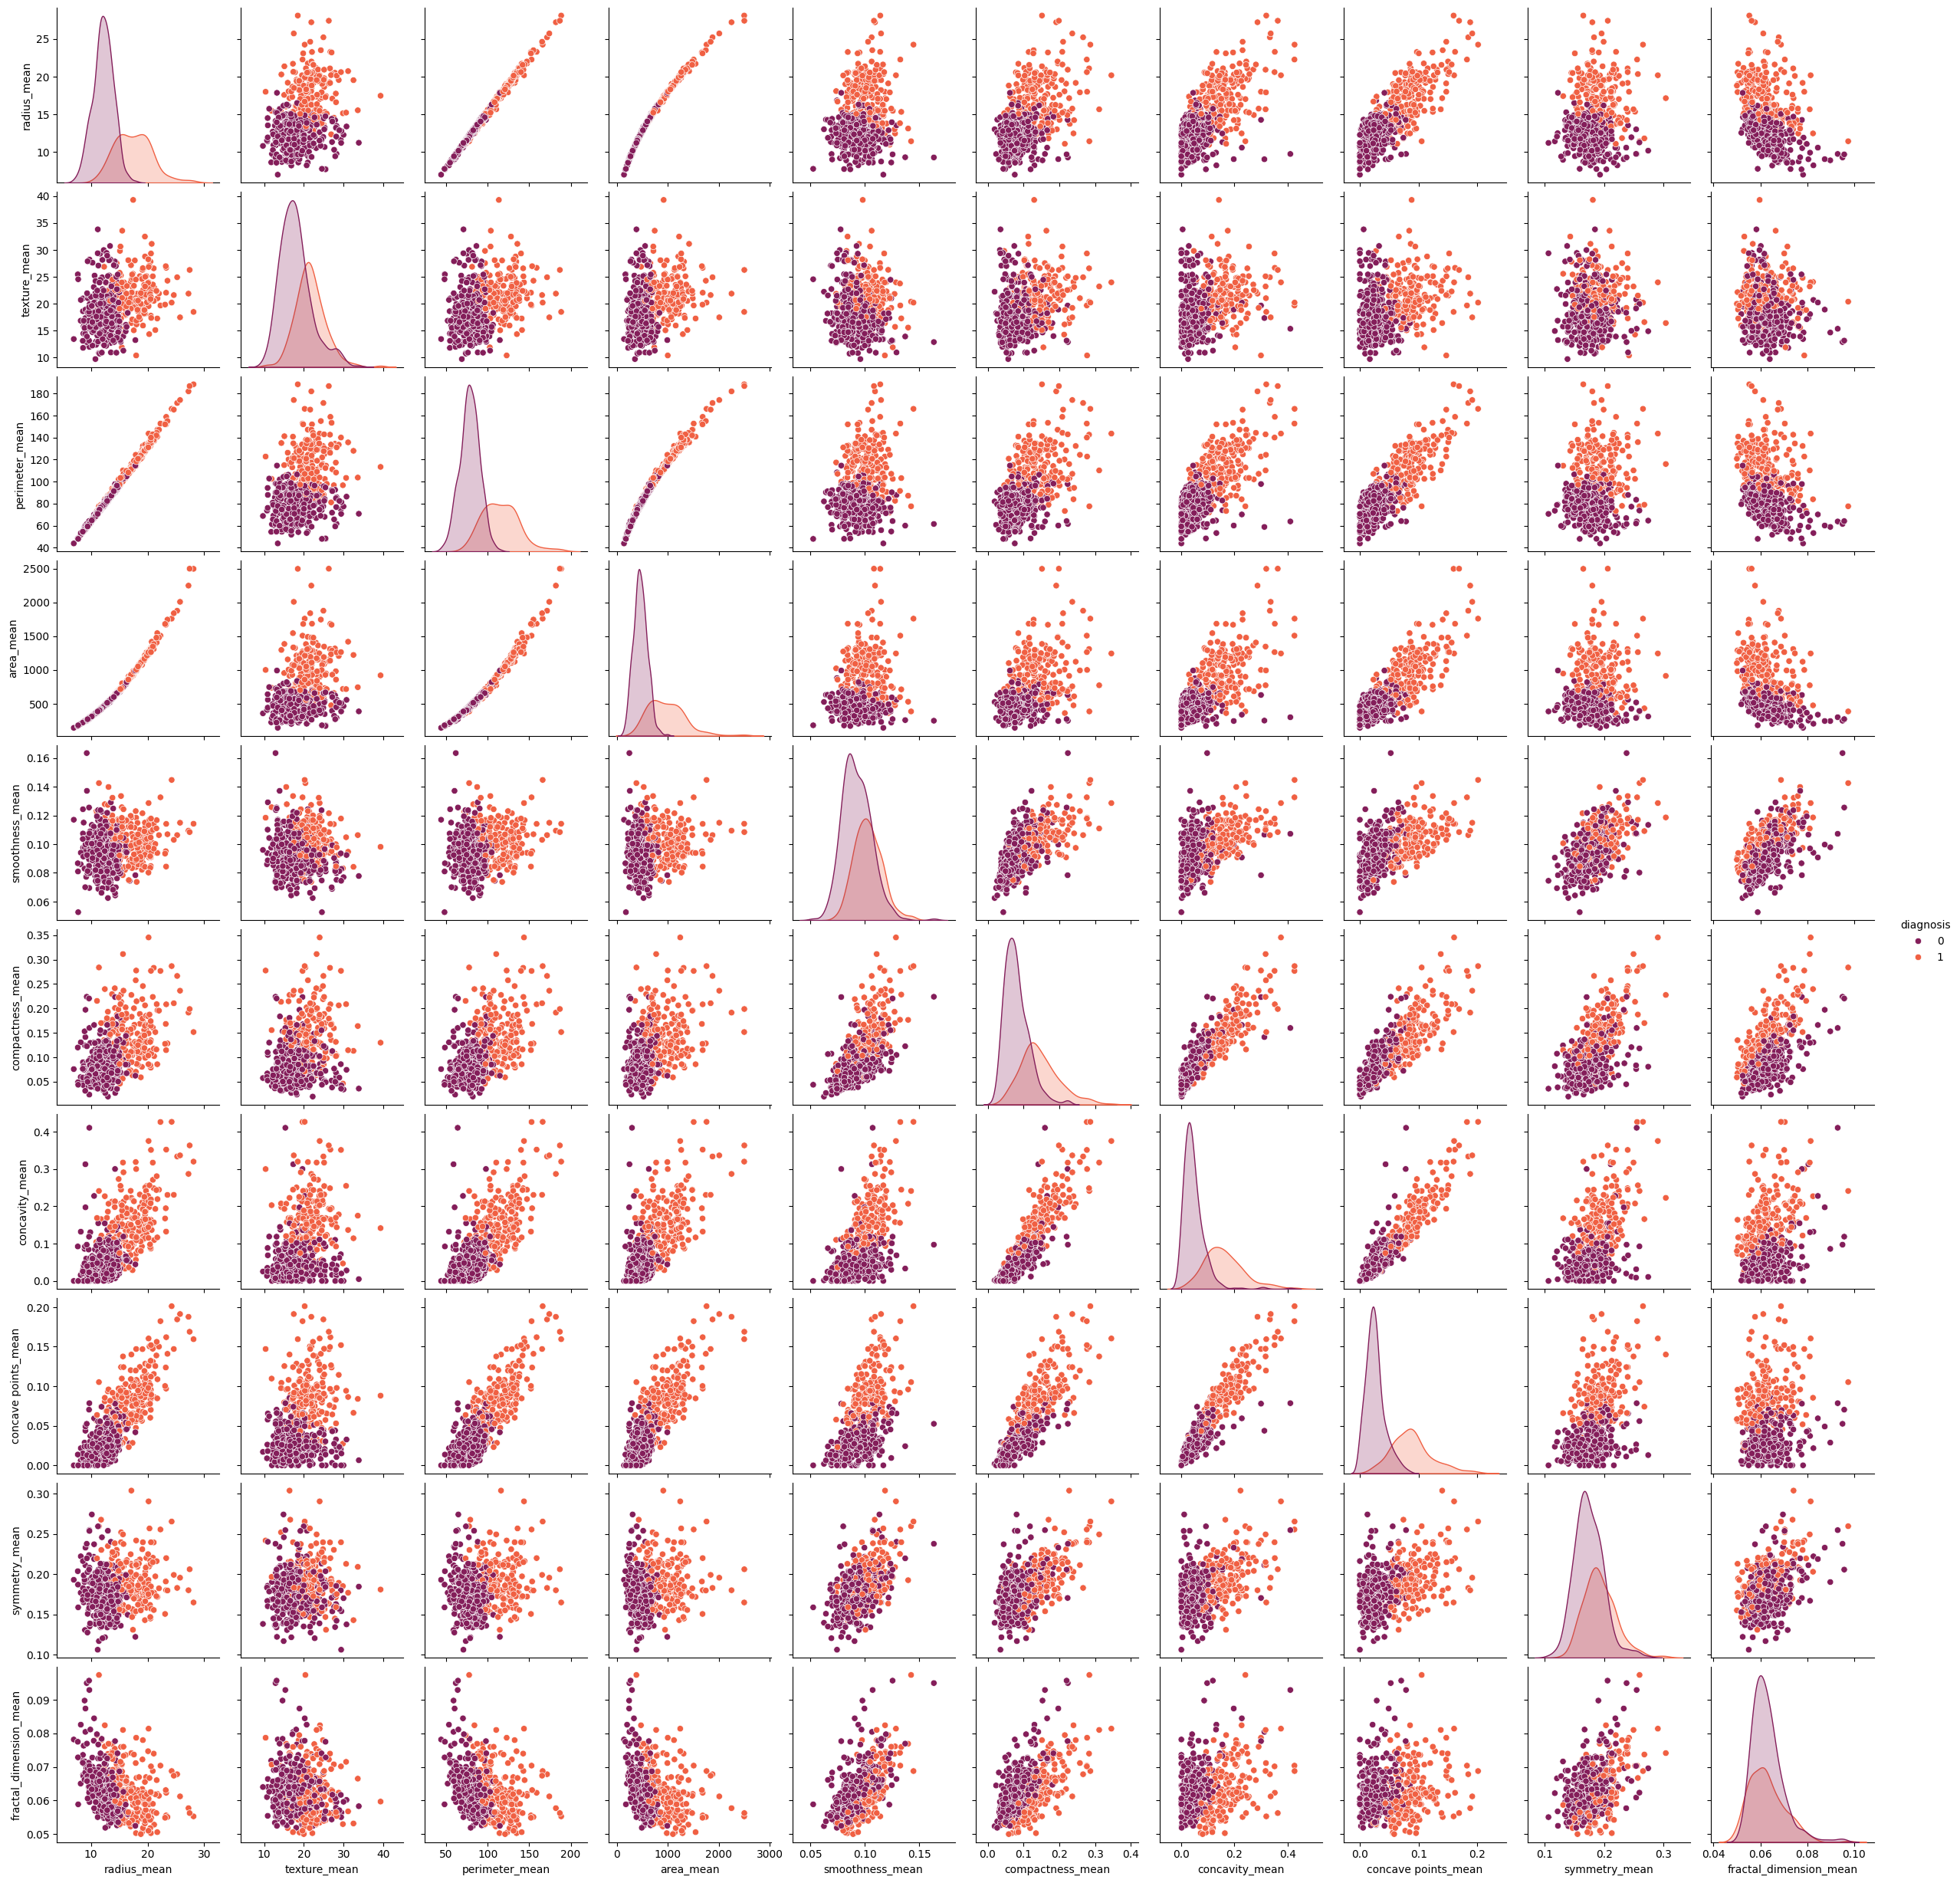

In [71]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='rocket')

Almost perfectly linear patterns between the radius_mean, perimeter_mean and area_mean attributes are hinting at the presence of multicollinearity between these variables. (they are highly linearly related)
Another set of variables that possibly imply multicollinearity are the concavity, concave_points and compactness.

we can verify the presence of multicollinearity between some of the variables. 

- For instance, the radius_mean column has a correlation of 1 and 0.99 with perimeter_mean and area_mean columns, respectively.
This is because the three columns essentially contain the same information, which is the physical size of the observation
(the cell). 
Therefore we should only pick ONE of the three columns when we go into further analysis.

- There is multicollinearity between the attributes compactness, concavity, and concave points. So we can choose just ONE out of these, I am going for Compactness.

- Here we drop col ending with _worst. Dropping _worst columns is done to remove redundancy in the feature set, especially when the mean or standard deviation values already provide enough information.

In [72]:
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

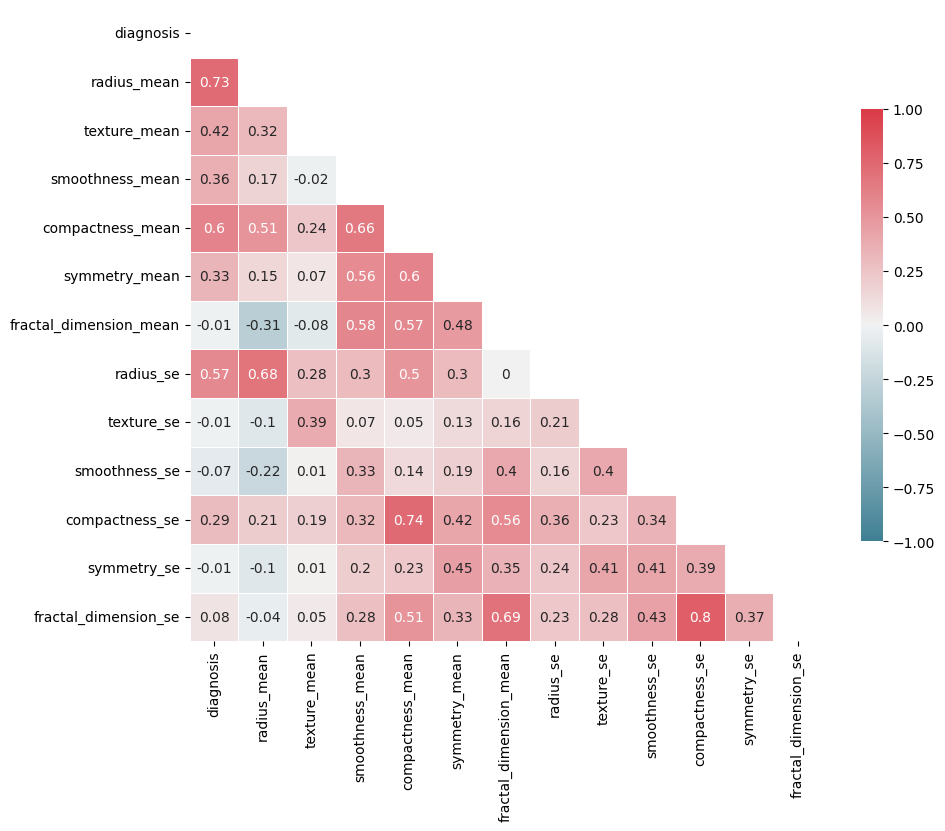

In [73]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

# Logistic Regression

## Preprocessing

Once our dataset is clean that that we know that our variables are reliable, we can proceed to train our model. The first thing to do is to do is to separate the target variable (here called "y") and the predictors (here called "X"). Note that we use an uppercase X as convention in order to mymic the mathematical language. In mathematics, an uppercase symbol represents that the variable is multidimensional (a matrix).

In [74]:
# Prepare the model
y = df["diagnosis"] # our target variable
X = df.drop(["diagnosis"], axis=1) # our predictors

## Normalize the data

You might be tempted to use this data to perform the train-test split directly. But wait! The data is not yet normalized. This can be a problem, because the units of our variables are not necessarily in the same units. Also, there might be some outliers that could cause our model to perform badly. 

What we do in these cases is normalize the data before feeding it into our model. This will improve the performance of our machine learning algorithm. 

In [75]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

# X_scaled is now a numpy array with normalized data

We then split the dataset into a training set and a testing set. Both have the same variables (columns), but different observations (rows). To do this, we use a very conveninent Scikit-Learn function called `train_test_split`. This function takes our predictors and our target variable and splits them into a testing set and a training set randomly. It returns 4 values:

- The predictors of our training set. We store this in a python variable that we call `X_train`.
- The targets of our training set. We will store them in a python variable that we call `y_train`. 
- The predictors of our testing set. We will store them in a python variable that we call `X_test`.
- The targets of our testing set. We will store them in a python variable that we call `y_test`. 

In them, each observation (row) in `X` corresponds to the target value in `y`.

Other parameters that our function `train_test_split` takes are `test_size` and `random_state`:
- `train_test_split` sets the size of our `X_test` and its `y_test`. 
- `random_state`, which is an arbitrary integer that will allow us to replicate the split if we ever need to perform the exact random split again. We usually choose 42 because it is the answer to everything.

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

## Evaluate the model (Logistic)

In this notebook, we have trained a logistic regression model to predict the target variable using a dataset of input features. As you can see here, after training the model on the training set and evaluating its performance on the test set, we achieved a final accuracy of 0.98. This is a strong performance and indicates that the model is able to make accurate predictions on new, unseen data. 

However, it's important to note that accuracy is just one measure of a model's performance, and it may not be the most appropriate measure for all problems. Depending on the problem and the specific requirements of the application, other metrics such as precision, recall, or F1 score may be more relevant. In the second cell, we use the `classification_report` function from `Scikit-learn` to calculate those measures. 

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


## Side note
The accuracy may be increased by not dropping columns that we dropped.

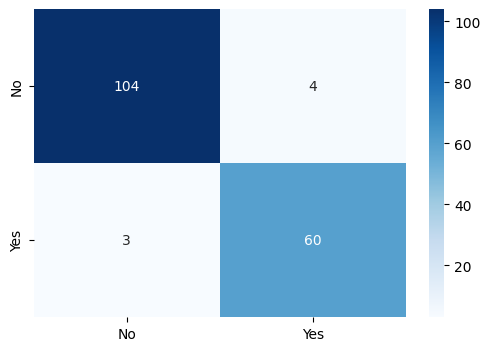

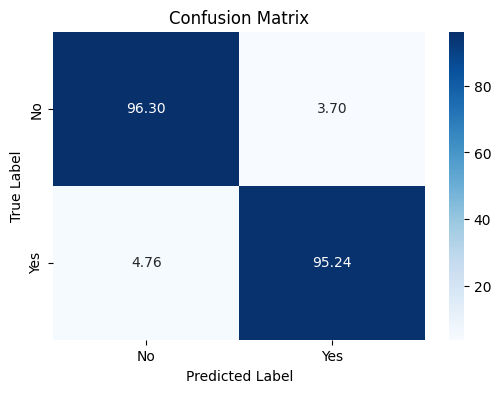

In [79]:
from sklearn.metrics import confusion_matrix

# Assuming these are your test labels and predictions
y_pred = model.predict(X_test)  # Predicted labels
cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix

# Normalize the confusion matrix (convert to percentages)
cm_percentage = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100  # Row-wise normalization

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

- High Precision (~0.85): Few false positives (incorrect positive predictions).
- High Recall (~0.90): Model captures most actual positives, missing very few.
- High F1-score (~0.87): Good balance between precision & recall.
- Accuracy (0.83): 83% of total predictions were correct.
- Macro vs. Weighted Avg:
   1. If classes are balanced, both values are similar.
   2. If imbalance exists, weighted avg is more meaningful.

## Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

model_dtc=DecisionTreeClassifier()
model_dtc.fit(X_train,y_train)
prediction_dtc=model_dtc.predict(X_test)
cm2= confusion_matrix(y_test,prediction_dtc)

print(cm2)
print("##########")
print(accuracy_score(y_test,prediction_dtc))

[[94 14]
 [ 8 55]]
##########
0.8713450292397661


## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

model_rfc=RandomForestClassifier()
model_rfc.fit(X_train, y_train)
prediction_rfc = model_rfc.predict(X_test)
cm3 = confusion_matrix(y_test, prediction_rfc)

print(cm3)
print("##########")
print(accuracy_score(y_test,prediction_rfc))

[[104   4]
 [  5  58]]
##########
0.9473684210526315


#### K Nearest Neighbor (K NN)
#### Support Vector Machine
#### Naive Bayes
Lets check above 3 model performance.

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate each model

results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=10,)
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN:, 0.911859, (0.050867)
NB:, 0.889295, (0.045611)
SVM:, 0.926987, (0.031097)


### SVM is doing good.
So lets work with SVM

In [86]:
# make predictions on validation datasets

SVM = SVC()
SVM.fit(X_train, y_train)
predictions_svm= SVM.predict(X_test)
print(accuracy_score(y_test, predictions_svm))
print("**********************")
print(classification_report(y_test, predictions_svm))
print("---------------------------")
print(confusion_matrix(y_test, predictions_svm))

0.9532163742690059
**********************
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

---------------------------
[[106   2]
 [  6  57]]
